## Notebook de l'Analyse Exploratoire 

In [1]:
import pandas as pd
import numpy as np

# lire 2015-building-energy-benchmarking.csv et 2016-building-energy-benchmarking.csv dans un dataframe pandas
build_eng2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
build_eng2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

# combien de lignes et combien de colonnes?
print("Il y a:", build_eng2015.shape[0],"lignes et", 
      build_eng2015.shape[1],"colonnes dans le jeu de données 2015-building-energy-benchmarking.csv.")

print("Il y a:", build_eng2016.shape[0],"lignes et", 
      build_eng2016.shape[1],"colonnes dans le jeu de données 2016-building-energy-benchmarking.csv.")

Il y a: 3340 lignes et 47 colonnes dans le jeu de données 2015-building-energy-benchmarking.csv.
Il y a: 3376 lignes et 46 colonnes dans le jeu de données 2016-building-energy-benchmarking.csv.


In [2]:
# fonction pour obtenir informations sur les valeurs manquantes

def vals_manquantes(data):
    # nombre de valeurs manquantes pour chaque colonne 
    missing_data = data.isnull().sum()
    
    # pourcentage de valeurs manquantes dans le dataframe 
    null_counts_pct = missing_data / data.shape[0] * 100
    # plus facile a visualiser ensemble (le nombre et le pourcentage):
    nulls_df = pd.DataFrame({'null_counts': missing_data, 'null_pct': null_counts_pct})
    
    # classer par les valeurs des pourcentages
    nulls_df = nulls_df.sort_values(by = "null_pct")
    return nulls_df


In [3]:
# fonction pour produire un heatmap des valeurs manquantes

def make_heatmap(data, rot_degr, leng, height):
    import matplotlib.pyplot as plt
    import seaborn as sns

    %matplotlib inline

    fig, axes = plt.subplots(figsize=[leng,height]) 
    # heatmap des valeurs manquantes dans ed_stats, non cleané
    sns_plot = sns.heatmap(data.isnull(), cbar = False)
    sns.set(font_scale = 1)  
    sns_plot.set_title("Heatmap des Valeurs Manquantes", fontsize = 15)
    plt.xticks(rotation = rot_degr, fontsize = 12)
    plt.yticks(rotation = 0, fontsize = 13)
    fig = sns_plot.get_figure()
    plt.show()
    # les valeurs manquantes sont en beige, les autres valeurs sont en noir. 

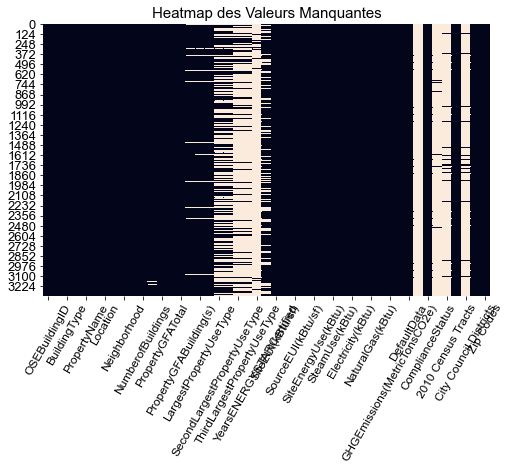

In [4]:
make_heatmap(build_eng2015, 60, 8, 5)

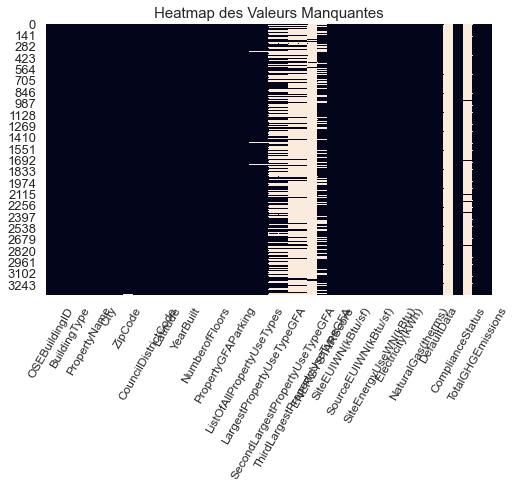

In [5]:
make_heatmap(build_eng2016, 60, 8, 5)

## Début du Nettoyage: doublons, suppression de lignes et colonnes

In [6]:
dupliROWS15 = build_eng2015[build_eng2015.duplicated(keep = False)]
dupliROWS15
# pas de lignes dupliquées dans le dataframe pour 2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes


In [7]:
dupliROWS16= build_eng2016[build_eng2016.duplicated(keep = False)]
dupliROWS16
# pas de lignes dupliquées dans le dataframe pour 2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [8]:
# ne garder que les individus qui sont Compliant
build12_eng15 = build_eng2015[(build_eng2015["ComplianceStatus"] == "Compliant")]

build12_eng16 = build_eng2016[(build_eng2016["ComplianceStatus"] == "Compliant")]

# autre version possible:
#build1_eng15 = build_eng2015[(build_eng2015["ComplianceStatus"] == "Compliant") | (build_eng2015["ComplianceStatus"] == "Error - Correct Default Data")]

#build1_eng16 = build_eng2016[(build_eng2016["ComplianceStatus"] == "Compliant") | (build_eng2016["ComplianceStatus"] == "Error - Correct Default Data")]


In [9]:
# inspecter les types de batiments 
print(build12_eng15["BuildingType"].value_counts())
print(build12_eng16["BuildingType"].value_counts())

NonResidential          1461
Multifamily LR (1-4)    1026
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64
NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: BuildingType, dtype: int64


In [10]:
# supprimer les property qui sont des habitations (on s'interesse uniquement aux bâtiments 
# non destinés à l’habitation)
build1_eng15 = build12_eng15[(build12_eng15["BuildingType"] == "NonResidential")
                             | (build12_eng15["BuildingType"] == "Nonresidential COS")
                             | (build12_eng15["BuildingType"] == "SPS-District K-12")
                             | (build12_eng15["BuildingType"] == "Campus")]

build1_eng16 = build12_eng16[(build12_eng16["BuildingType"] == "NonResidential") 
                               | (build12_eng16["BuildingType"] == "Nonresidential COS") 
                               | (build12_eng16["BuildingType"] == "SPS-District K-12") 
                               | (build12_eng16["BuildingType"] == "Nonresidential WA") 
                               | (build12_eng16["BuildingType"] == "Campus")]

# vérifier les types de batiments qui restent 
print(build1_eng15["BuildingType"].value_counts())
print(build1_eng16["BuildingType"].value_counts())


NonResidential        1461
SPS-District K-12       99
Nonresidential COS      68
Campus                  22
Name: BuildingType, dtype: int64
NonResidential        1432
Nonresidential COS      81
Campus                  24
SPS-District K-12       10
Nonresidential WA        1
Name: BuildingType, dtype: int64


In [11]:
# supprimer les individus pour lesquels l'usage principal (Largest Property Use Type) est l'habitation 
# (après l'étape précédente, il reste des individus dont l'usage est de type mixte et 
# qui sont donc destinés à plusieurs usages, dont l'habitation)
print("Il y a:", build1_eng15.shape[0],"lignes et", build1_eng15.shape[1],"colonnes dans le dataframe")
print("Il y a:", build1_eng16.shape[0],"lignes et", build1_eng16.shape[1],"colonnes dans le dataframe")

nopat = build1_eng15["LargestPropertyUseType"].str.contains(r"[Ff]amily", na = False)
build1_eng2015 = build1_eng15[~nopat].copy()
#build1_eng2015.reset_index(inplace=True)

nopat2 = build1_eng16["LargestPropertyUseType"].str.contains(r"[Ff]amily", na = False)
build1_eng2016 = build1_eng16[~nopat2].copy()
#build1_eng2016.reset_index(inplace=True)

print("Il y a:", build1_eng2015.shape[0],"lignes et", build1_eng2015.shape[1],"colonnes dans le dataframe")
print("Il y a:", build1_eng2016.shape[0],"lignes et", build1_eng2015.shape[1],"colonnes dans le dataframe")


Il y a: 1650 lignes et 47 colonnes dans le dataframe
Il y a: 1548 lignes et 46 colonnes dans le dataframe
Il y a: 1639 lignes et 47 colonnes dans le dataframe
Il y a: 1537 lignes et 47 colonnes dans le dataframe


In [12]:
vals_manquantes(build1_eng2015)

,null_counts,null_pct
OSEBuildingID,0,0.000000
ComplianceStatus,0,0.000000
PropertyGFABuilding(s),0,0.000000
PropertyGFAParking,0,0.000000
PropertyGFATotal,0,0.000000
NumberofBuildings,0,0.000000
YearBuilt,0,0.000000
Neighborhood,0,0.000000
Zip Codes,0,0.000000
Location,0,0.000000


In [13]:
vals_manquantes(build1_eng2016)

,null_counts,null_pct
OSEBuildingID,0,0.000000
PropertyGFABuilding(s),0,0.000000
ListOfAllPropertyUseTypes,0,0.000000
TotalGHGEmissions,0,0.000000
SiteEUI(kBtu/sf),0,0.000000
SourceEUI(kBtu/sf),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
PropertyGFAParking,0,0.000000
SiteEnergyUse(kBtu),0,0.000000
Electricity(kWh),0,0.000000


In [14]:
# supprimer les individus (année 2015) dont la valeur est manquante pour les colonnes 
# qui deviendront nos variables dépendantes par la suite

print("Il y a:", build1_eng2015.shape[0],"lignes et", build1_eng2015.shape[1],"colonnes dans le dataframe")
sub = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']
build_eng15 = build1_eng2015.dropna(subset = sub).copy()
print("Il y a:", build_eng15.shape[0],"lignes et", build_eng15.shape[1],"colonnes dans le dataframe")

Il y a: 1639 lignes et 47 colonnes dans le dataframe
Il y a: 1632 lignes et 47 colonnes dans le dataframe


In [15]:
# supprimer les individus (anée 2016) dont la valeur est manquante pour les colonnes 
# qui deviendront nos variables dépandentes par la suite

print("Il y a:", build1_eng2016.shape[0],"lignes et", build1_eng2016.shape[1],"colonnes dans le dataframe")
sub = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']
build_eng16 = build1_eng2016.dropna(subset = sub).copy()
print("Il y a:", build_eng16.shape[0],"lignes et", build_eng16.shape[1],"colonnes dans le dataframe.")


Il y a: 1537 lignes et 46 colonnes dans le dataframe
Il y a: 1536 lignes et 46 colonnes dans le dataframe.


In [16]:
vals_manquantes(build_eng15)

,null_counts,null_pct
OSEBuildingID,0,0.000000
SourceEUI(kBtu/sf),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
SiteEnergyUse(kBtu),0,0.000000
SiteEnergyUseWN(kBtu),0,0.000000
SteamUse(kBtu),0,0.000000
Electricity(kWh),0,0.000000
SiteEUIWN(kBtu/sf),0,0.000000
Electricity(kBtu),0,0.000000
NaturalGas(kBtu),0,0.000000


In [17]:
vals_manquantes(build_eng16)

,null_counts,null_pct
OSEBuildingID,0,0.000000
ListOfAllPropertyUseTypes,0,0.000000
TotalGHGEmissions,0,0.000000
SiteEUI(kBtu/sf),0,0.000000
SiteEUIWN(kBtu/sf),0,0.000000
SourceEUI(kBtu/sf),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
SiteEnergyUse(kBtu),0,0.000000
SiteEnergyUseWN(kBtu),0,0.000000
SteamUse(kBtu),0,0.000000


In [20]:
# inspecter la colonne "Number of Floors" pour l'année 2015 (pas de vals manquantes pour l'année 2016)
floors15 = build_eng15.sort_values(by= 'NumberofFloors', ascending=False)
print(build_eng15['NumberofFloors'].mean())
print(build_eng15['NumberofFloors'].median())
print(build_eng15['NumberofFloors'].mode())
print(build_eng15['NumberofFloors'].value_counts())

4.114583333333333
2.0
0    1.0
dtype: float64
1.0     446
2.0     402
3.0     266
4.0     146
5.0      99
6.0      82
7.0      33
8.0      21
11.0     18
10.0     17
9.0       8
14.0      8
12.0      7
15.0      7
13.0      6
0.0       5
42.0      5
19.0      5
17.0      4
21.0      3
24.0      3
20.0      3
22.0      3
29.0      3
16.0      3
33.0      3
18.0      3
25.0      3
36.0      2
34.0      2
41.0      2
23.0      2
63.0      1
46.0      1
27.0      1
55.0      1
76.0      1
37.0      1
47.0      1
30.0      1
28.0      1
49.0      1
99.0      1
56.0      1
Name: NumberofFloors, dtype: int64


In [19]:
# si Number of Floors est une valeur manquante, la remplacer par 2 
build_eng15.NumberofFloors[build_eng15.NumberofFloors.isnull() == True] = 2.0

<ipython-input-19-9d790cdb2371>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_eng15.NumberofFloors[build_eng15.NumberofFloors.isnull() == True] = 2.0


In [22]:
# supprimer des colonnes pour le jeu de données de 2015

print("Il y a:", build_eng15.shape[0],"lignes et", build_eng15.shape[1],"colonnes dans le dataframe")

# supprimer les colonnes qui ne sont pas pertinentes pour notre projet
drop_list = ['PropertyName', 
             'TaxParcelIdentificationNumber', 
             'Location', 'CouncilDistrictCode', 'Neighborhood', 
             '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas',
             'City Council Districts', 'SPD Beats', 
             'Zip Codes',
             'ComplianceStatus',
             'Comment', 'Outlier',
             'Electricity(kWh)', 'NaturalGas(therms)']

build2_eng15 = build_eng15.drop(drop_list, axis=1).copy()


print("Il y a:", build2_eng15.shape[0],"lignes et", build2_eng15.shape[1],"colonnes dans le dataframe.")


Il y a: 1632 lignes et 47 colonnes dans le dataframe
Il y a: 1632 lignes et 32 colonnes dans le dataframe.


In [23]:
# supprimer des colonnes pour le jeu de données de 2016

print("Il y a:", build_eng16.shape[0], "lignes et", build_eng16.shape[1], "colonnesdans le dataframe")

# supprimer les colonnes qui ne sont pas pertinentes pour notre projet
drop_list = ['PropertyName', 
             'Address', 'City', 'State', 'ZipCode',
             'TaxParcelIdentificationNumber', 
             'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
             'ComplianceStatus', 
             'Comments', 'Outlier',
             'Electricity(kWh)', 'NaturalGas(therms)']

build2_eng16 = build_eng16.drop(drop_list, axis=1).copy()

# combien de lignes et combien de colonnes?
print("Il y a:", build2_eng16.shape[0], "lignes et", build2_eng16.shape[1], "colonnesdans le dataframe")

Il y a: 1536 lignes et 46 colonnesdans le dataframe
Il y a: 1536 lignes et 31 colonnesdans le dataframe


In [24]:
# changer le nom de colonnes pour cohérence entre les dataframes

build2_eng15.rename(columns = {'GHGEmissions(MetricTonsCO2e)': 'GHGEmissions_MetricTonsCO2e'}, inplace = True)
build2_eng15.rename(columns = {'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity_kgCO2e_ft2'}, inplace = True)
build2_eng16.rename(columns = {'TotalGHGEmissions': 'GHGEmissions_MetricTonsCO2e'}, inplace = True)
build2_eng16.rename(columns = {'GHGEmissionsIntensity':'GHGEmissionsIntensity_kgCO2e_ft2'}, inplace = True)


In [25]:
# inspection de la variable 'NumberofBuildings' en 2015
build2_eng15.sort_values(by= 'NumberofBuildings', ascending=False)
#build2_eng15['NumberofBuildings'].value_counts()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2,DefaultData
1508,22062,2015,Campus,College/University,1939,39,2.0,2200000,0,2200000,...,158.3,115080128.0,131427232.0,0.0,62416157.0,52666569.0,0.0,3232.23,1.35,No
161,261,2015,Campus,Large Office,1980,16,2.0,334368,31874,302494,...,442.5,52273792.0,53294752.0,0.0,44866796.0,7408855.0,0.0,706.26,1.53,No
127,211,2015,Campus,College/University,1970,11,2.0,694072,111625,582447,...,169.8,37117212.0,39513408.0,0.0,33183593.0,3934997.0,0.0,440.31,0.43,No
2015,24086,2015,Campus,Other,1991,10,2.0,180796,0,180796,...,305.3,29939196.0,33884892.0,0.0,16720050.0,13219839.0,0.0,818.66,4.13,No
3209,49705,2015,Nonresidential COS,Other,1929,7,2.0,502030,0,502030,...,76.3,17290816.0,20657716.0,0.0,9661544.0,7629673.0,0.0,472.56,0.86,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,752,2015,NonResidential,Large Office,1963,1,11.0,169020,0,169020,...,137.8,10110827.0,10845096.0,2726250.0,6065399.0,1319431.0,0.0,322.79,1.76,No
558,751,2015,NonResidential,Large Office,1983,1,15.0,378002,116280,261722,...,188.8,17572308.0,18635778.0,0.0,15056355.0,2516578.0,0.0,238.61,0.46,No
557,749,2015,NonResidential,Large Office,1975,1,8.0,150000,23630,126370,...,210.9,9088373.0,9088373.0,0.0,8385608.0,703114.0,0.0,95.80,0.40,No
556,748,2015,NonResidential,Small- and Mid-Sized Office,1902,1,3.0,76893,0,76893,...,286.3,12187231.0,12374414.0,0.0,8332037.0,3855539.0,0.0,262.85,2.95,No


In [26]:
# inspection de la variable 'NumberofBuildings' en 2016
build2_eng16.sort_values(by= 'NumberofBuildings', ascending=False)
#build2_eng15['NumberofBuildings'].value_counts()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2
3274,49967,2016,Campus,University,1900,111.0,0,9320156,0,9320156,...,246.600006,0.000000,8.739237e+08,0.0,84985240.0,657074389.0,0.0,False,11140.56,1.20
105,172,2016,Campus,University,1970,27.0,2,441071,0,441071,...,192.800003,202.600006,3.830174e+07,41151732.0,0.0,25314575.0,12987166.0,False,866.23,1.96
1862,23622,2016,Campus,Other,1955,23.0,1,260241,0,260241,...,353.200012,374.500000,3.401298e+07,36034584.0,0.0,26894616.0,7118362.0,False,565.55,2.17
2325,25251,2016,Campus,University,1945,14.0,2,537000,0,537000,...,266.799988,278.899994,9.060964e+07,96775464.0,0.0,22619097.0,67990538.0,False,3768.66,7.02
162,261,2016,Campus,Large Office,1980,14.0,2,334368,31874,302494,...,451.200012,453.299988,5.346668e+07,54136068.0,0.0,45321378.0,8145300.0,False,748.55,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,517,2016,NonResidential,Supermarket / Grocery Store,1984,0.0,1,144776,0,144776,...,246.199997,249.100006,1.342408e+07,13827966.0,0.0,10307295.0,3116783.0,False,237.39,1.64
3108,33289,2016,NonResidential,Large Office,1982,0.0,24,119701,0,119701,...,219.899994,219.899994,8.382140e+06,8382140.5,0.0,8382139.0,0.0,False,58.44,0.49
544,735,2016,NonResidential,Warehouse,1974,0.0,3,56259,0,56259,...,74.199997,80.500000,2.346572e+06,2685146.5,0.0,817697.0,1528874.0,False,86.90,1.54
358,504,2016,Nonresidential COS,Other,1955,0.0,1,113780,0,113780,...,60.000000,64.099998,3.574542e+06,4021869.0,0.0,1470885.0,2103657.0,False,121.98,1.07


In [28]:
# inspecter la variable "PropertyGFATotal"
build2_eng15.sort_values(by= 'PropertyGFATotal', ascending=False)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2,DefaultData
1508,22062,2015,Campus,College/University,1939,39,2.0,2200000,0,2200000,...,158.3,115080128.0,131427232.0,0.0,62416157.0,52666569.0,0.0,3232.23,1.35,No
581,775,2015,NonResidential,Large Office,1985,1,76.0,1952220,319400,1632820,...,169.1,94560088.0,93255440.0,0.0,90754881.0,3808965.0,0.0,834.96,0.23,No
621,828,2015,NonResidential,Hospital,1994,1,14.0,1765970,0,1765970,...,372.0,286685536.0,292746272.0,127869744.0,140448322.0,18373320.0,0.0,11824.89,6.35,No
293,422,2015,NonResidential,Large Office,1989,1,56.0,1605578,389860,1215718,...,111.8,48342560.0,49973408.0,595133.0,45187640.0,2561662.0,0.0,496.99,0.19,No
492,659,2015,NonResidential,Large Office,2005,1,42.0,1592914,297457,1295457,...,0.0,58041572.0,0.0,1099052.0,56530281.0,414587.0,0.0,500.93,0.16,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,27007,2015,NonResidential,Worship Facility,1954,1,2.0,20039,0,20039,...,19.1,122156.0,122156.0,0.0,122161.0,0.0,0.0,0.85,0.02,No
789,19853,2015,NonResidential,Small- and Mid-Sized Office,1929,1,2.0,20028,0,20028,...,71.3,552583.0,647030.0,216792.0,335805.0,0.0,0.0,19.07,0.88,No
1598,22574,2015,NonResidential,Small- and Mid-Sized Office,1961,1,2.0,20022,0,20022,...,106.7,662785.0,706480.0,0.0,662812.0,0.0,0.0,4.62,0.09,No
2215,24725,2015,NonResidential,Non-Refrigerated Warehouse,1926,1,1.0,20000,0,20000,...,50.5,554528.0,734828.0,0.0,114189.0,440344.0,0.0,24.18,1.18,No


In [27]:
# inspecter la variable "OSEBuildingID"
build2_eng15.value_counts('OSEBuildingID')

OSEBuildingID
1        1
23331    1
23416    1
23410    1
23408    1
        ..
745      1
744      1
743      1
742      1
50038    1
Length: 1632, dtype: int64

In [29]:
vals_manquantes(build2_eng15)

,null_counts,null_pct
OSEBuildingID,0,0.000000
GHGEmissions_MetricTonsCO2e,0,0.000000
OtherFuelUse(kBtu),0,0.000000
NaturalGas(kBtu),0,0.000000
Electricity(kBtu),0,0.000000
SteamUse(kBtu),0,0.000000
SiteEnergyUseWN(kBtu),0,0.000000
SiteEnergyUse(kBtu),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
SourceEUI(kBtu/sf),0,0.000000


In [30]:
vals_manquantes(build2_eng16)

,null_counts,null_pct
OSEBuildingID,0,0.000000
DefaultData,0,0.000000
NaturalGas(kBtu),0,0.000000
Electricity(kBtu),0,0.000000
SteamUse(kBtu),0,0.000000
SiteEnergyUseWN(kBtu),0,0.000000
SiteEnergyUse(kBtu),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
SourceEUI(kBtu/sf),0,0.000000
SiteEUIWN(kBtu/sf),0,0.000000



## Transformation d'une variable Catégorielle en variable Quantitative

In [31]:
# inspecter les colonnes à voir avec l'usage du bâtiment
print(build2_eng15['PrimaryPropertyType'].value_counts())
print(build2_eng16['PrimaryPropertyType'].value_counts())

print(build2_eng15['LargestPropertyUseType'].value_counts())
print(build2_eng16['LargestPropertyUseType'].value_counts())

# on remarque que LargestPropertyUseType est une variable
# plus détaillé que PrimaryPropertyType mais dont plus de valeurs sont manquantes

Small- and Mid-Sized Office    296
Other                          252
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    130
Retail Store                   100
Mixed Use Property              97
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              21
Senior Care Community           19
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Hospital                        10
Restaurant\n                    10
SPS-District K-12                4
Distribution Center              2
Self-Storage Facility            1
Laboratory                       1
Restaurant                       1
Name: PrimaryPropertyType, dtype: int64
Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office   

In [32]:
# si LargestPropertyUseType est une valeur manquante, la remplacer par PrimaryPropertyType
build2_eng15.LargestPropertyUseType[build2_eng15.LargestPropertyUseType.isnull() == True] = build2_eng15.PrimaryPropertyType
build2_eng16.LargestPropertyUseType[build2_eng16.LargestPropertyUseType.isnull() == True] = build2_eng16.PrimaryPropertyType


<ipython-input-32-1acb5fe65f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build2_eng15.LargestPropertyUseType[build2_eng15.LargestPropertyUseType.isnull() == True] = build2_eng15.PrimaryPropertyType
<ipython-input-32-1acb5fe65f93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build2_eng16.LargestPropertyUseType[build2_eng16.LargestPropertyUseType.isnull() == True] = build2_eng16.PrimaryPropertyType


In [33]:
# transformer la variable catégorielle 'LargestPropertyUseType' en variables numériques

# creation de nouvelles colonnes pour les variables quantitatives
categories2 = ['LargestPropertyUseT_Office', 
               'LargestPropertyUseT_Non_Refrig_Warehouse', 
               'LargestPropertyUseT_Other']

for cat in categories2:
    build2_eng15[cat] = 0

for cat in categories2:
    build2_eng16[cat] = 0


In [34]:
# fonction pour transformer mes variables categorielles en variables quantitatives

def cat_to_quant(df, categories):
    df.reset_index(inplace=True)
    
    cat2 = ['LargestPropertyUseT_Office', 
                   'LargestPropertyUseT_Non_Refrig_Warehouse', 
                   'LargestPropertyUseT_Other']
    
    # si la valeur est égale à celle predéfinie dans "categories" (voir input) alors on lui donne la valeur 
    # de 1, sinon elle restera égale à 0 (voir cellule au-dessus)
    for index, value in enumerate(df['LargestPropertyUseType']):
        
        if value == categories[0]:
            df.loc[index, cat2[0]] = 1
            
        elif value == categories[1]:
            df.loc[index, cat2[1]] = 1
            
        else: 
            df.loc[index, cat2[2]] = 1
    
    return df


In [35]:
categories = ['Office', 'Non-Refrigerated Warehouse']

build3_eng15 = cat_to_quant(build2_eng15.copy(), categories)
build3_eng16 = cat_to_quant(build2_eng16.copy(), categories)


In [36]:
# après l'extraction des informations en rapport avec l'usage du bâtiment, supprimer les colonnes 
# liées à cela qui ne sont pas pertinentes pour notre projet

print("Il y a:", build3_eng15.shape[0],"lignes et", build3_eng15.shape[1],"colonnes dans le dataframe")
print("Il y a:", build3_eng16.shape[0], "lignes et", build3_eng16.shape[1], "colonnesdans le dataframe")
drop_list = ['BuildingType', 
             'PrimaryPropertyType', 
             'ListOfAllPropertyUseTypes', 
             'LargestPropertyUseTypeGFA',
             'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA', 
             'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']

build4_eng15 = build3_eng15.drop(drop_list, axis=1).copy()
build4_eng16 = build3_eng16.drop(drop_list, axis=1).copy()

print("Il y a:", build4_eng15.shape[0],"lignes et", build4_eng15.shape[1],"colonnes dans le dataframe.")
print("Il y a:", build4_eng16.shape[0], "lignes et", build4_eng16.shape[1], "colonnesdans le dataframe")

Il y a: 1632 lignes et 36 colonnes dans le dataframe
Il y a: 1536 lignes et 35 colonnesdans le dataframe
Il y a: 1632 lignes et 28 colonnes dans le dataframe.
Il y a: 1536 lignes et 27 colonnesdans le dataframe


## Création de nouvelles variables pour :
## le type d'énergie majoritaire du bâtiment et le pourcentage de property / parking des bâtiments

In [37]:
# création d'une variable "Age" pour utiliser la variable "YearBuilt"

build4_eng15["Age"] = 2021 - build4_eng15["YearBuilt"]
build4_eng16["Age"] = 2021 - build4_eng16["YearBuilt"]


In [38]:
# trouver l'énergie majoritaire pour chaque batiment 
list1 = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'] 
list2 = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'] 

build4_eng15["maxEnergy_type"] = build4_eng15[list1].idxmax(axis = 1) 
build4_eng16["maxEnergy_type"] = build4_eng16[list2].idxmax(axis = 1) 

# créer des variables dummies pour transformer le type d'energie majoritaire en varibles quantitatives
concat1 = pd.get_dummies(build4_eng15["maxEnergy_type"])
concat2 = pd.get_dummies(build4_eng16["maxEnergy_type"])

# renommer les colonnes pour éviter toute confusion plus tard
concat1.columns = ['ElectricitykBtu_Maj', 'NaturalGas(kBtu)_Maj', 'SteamUse(kBtu)_Maj']
concat2.columns = ['ElectricitykBtu_Maj', 'NaturalGas(kBtu)_Maj', 'SteamUse(kBtu)_Maj']


In [39]:
# concat les nouvelles variables dans le dataframe principal
build4_eng15 = pd.concat([concat1.copy(), build4_eng15.copy()], axis =1)

build4_eng16 = pd.concat([concat2.copy(), build4_eng16.copy()], axis = 1)


In [40]:
# transformer PropertyGFABuilding(s) et PropertyGFAParking en %
build4_eng15['Building_GFA_percentage'] = (build4_eng15['PropertyGFABuilding(s)'] / build4_eng15['PropertyGFATotal']) * 100
build4_eng16['Building_GFA_percentage'] = (build4_eng16['PropertyGFABuilding(s)'] / build4_eng16['PropertyGFATotal']) * 100

build4_eng15['Parking_GFA_percentage'] = (build4_eng15['PropertyGFAParking'] / build4_eng15['PropertyGFATotal']) * 100
build4_eng16['Parking_GFA_percentage'] = (build4_eng16['PropertyGFAParking'] / build4_eng16['PropertyGFATotal']) * 100



In [41]:
vals_manquantes(build4_eng15)

,null_counts,null_pct
ElectricitykBtu_Maj,0,0.000000
SiteEnergyUse(kBtu),0,0.000000
SiteEnergyUseWN(kBtu),0,0.000000
SteamUse(kBtu),0,0.000000
Electricity(kBtu),0,0.000000
NaturalGas(kBtu),0,0.000000
OtherFuelUse(kBtu),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
GHGEmissions_MetricTonsCO2e,0,0.000000
DefaultData,0,0.000000


In [42]:
vals_manquantes(build4_eng16)

,null_counts,null_pct
ElectricitykBtu_Maj,0,0.000000
maxEnergy_type,0,0.000000
Age,0,0.000000
LargestPropertyUseT_Other,0,0.000000
LargestPropertyUseT_Non_Refrig_Warehouse,0,0.000000
LargestPropertyUseT_Office,0,0.000000
GHGEmissionsIntensity_kgCO2e_ft2,0,0.000000
GHGEmissions_MetricTonsCO2e,0,0.000000
DefaultData,0,0.000000
NaturalGas(kBtu),0,0.000000


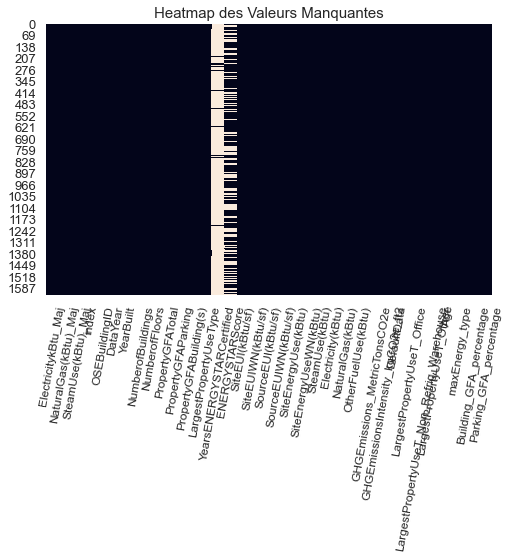

In [49]:
make_heatmap(build4_eng15, 80, 8, 5)

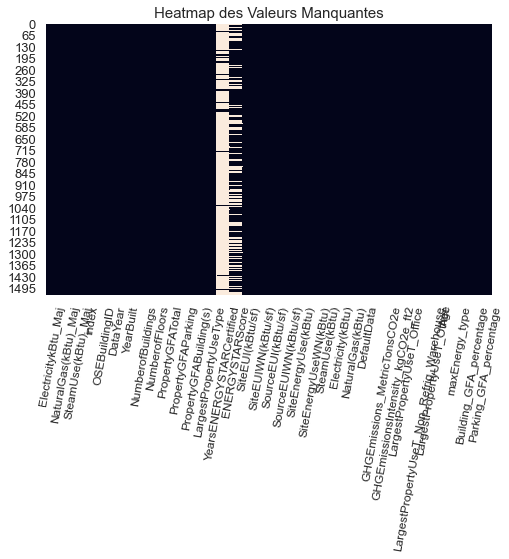

In [48]:
make_heatmap(build4_eng16, 80, 8, 5)

## Valeurs Aberrantes

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxes(data, col, title):
    
    fig, axes = plt.subplots(figsize=[10,6]) 
    
    sns_plot2 = sns.boxplot(data = data, y= col, 
                            whis=[5, 95])

    for item in sns_plot2.get_xticklabels():
        item.set_rotation(90)

    sns_plot2.spines['top'].set_visible(False)
    sns_plot2.spines['right'].set_visible(False)
    sns_plot2.spines['left'].set_visible(False)
    
    # supprimer y-axis tick marks
    sns_plot2.yaxis.set_ticks_position('none')
    
    # rajouter major gridlines y-axis
    #sns_plot2.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.2)  
    plt.title(title, fontsize = 15)
    
    return sns_plot2


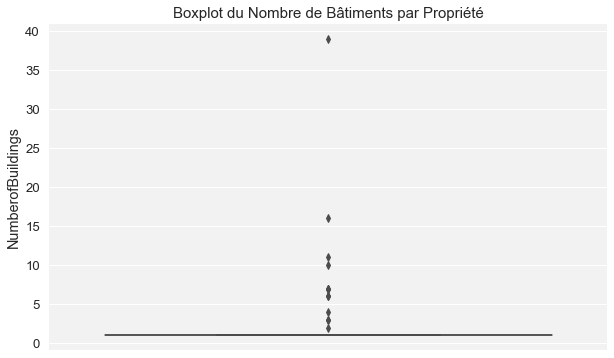

In [104]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

sns_plot = plot_boxes(build4_eng15,'NumberofBuildings', 'Boxplot du Nombre de Bâtiments par Propriété')

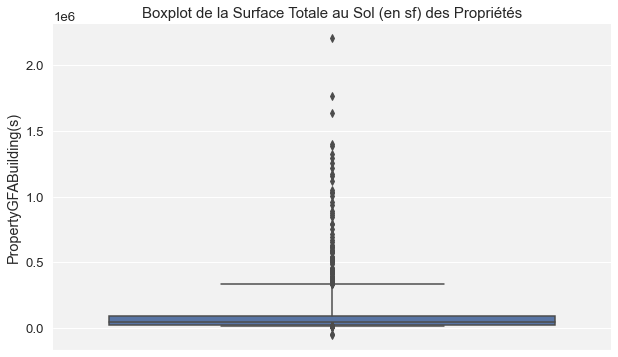

In [99]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

sns_plot = plot_boxes(build4_eng15,'PropertyGFABuilding(s)', 
                      'Boxplot de la Surface Totale au Sol (en sf) des Propriétés') 

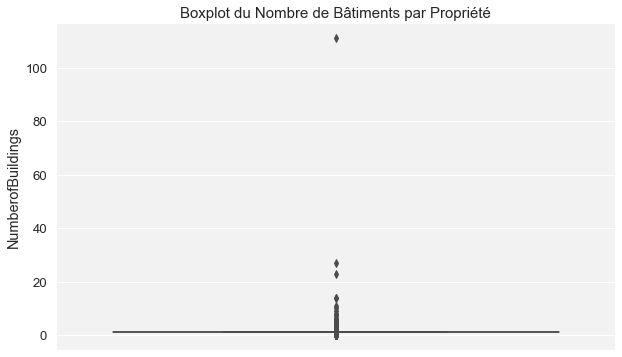

In [103]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

sns_plot = plot_boxes(build4_eng16,'NumberofBuildings', 'Boxplot du Nombre de Bâtiments par Propriété')

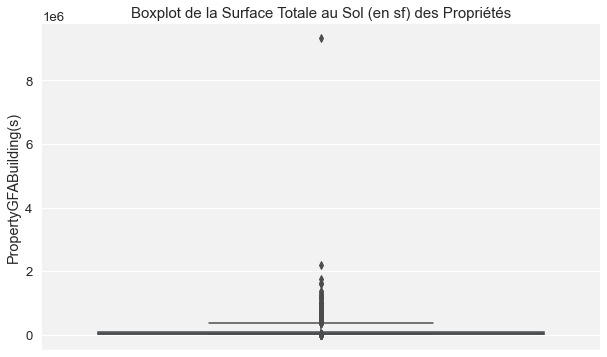

In [105]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

sns_plot = plot_boxes(build4_eng16,'PropertyGFABuilding(s)', 
                      'Boxplot de la Surface Totale au Sol (en sf) des Propriétés') 

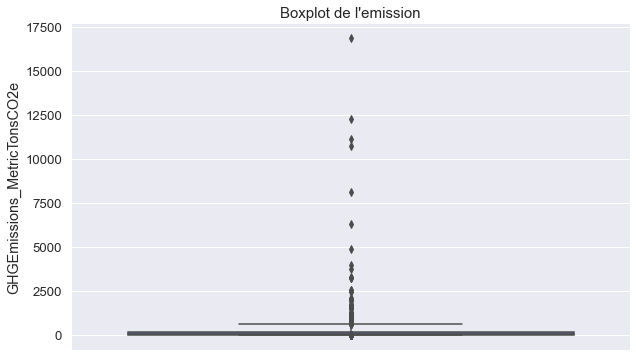

In [106]:
sns_plot = plot_boxes(build4_eng16,'GHGEmissions_MetricTonsCO2e', 'Boxplot de l\'emission')

In [108]:
# supprimer les valeurs aberrantes pour Site Energy Use et GHGEmissions_MetricTonsCO2e
indexNames = build4_eng15[build4_eng15['SiteEnergyUse(kBtu)'] <= 0].index
build4_eng15.drop(indexNames, inplace =True)

indexNames2 = build4_eng16[build4_eng16['SiteEnergyUse(kBtu)'] <= 0].index
build4_eng16.drop(indexNames2, inplace =True)

indexNames21 = build4_eng16[build4_eng16['GHGEmissions_MetricTonsCO2e'] <= 0].index
build4_eng16.drop(indexNames21, inplace =True)


Text(0.5, 0, 'SiteEnergyUse(kBtu)')

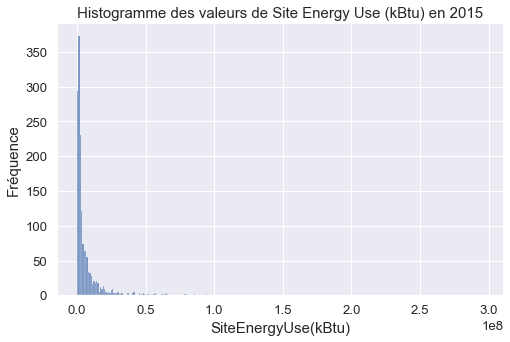

In [109]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng15['SiteEnergyUse(kBtu)'])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de Site Energy Use (kBtu) en 2015', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel('SiteEnergyUse(kBtu)', fontsize = 15)

Text(0.5, 0, 'SiteEnergyUse(kBtu)')

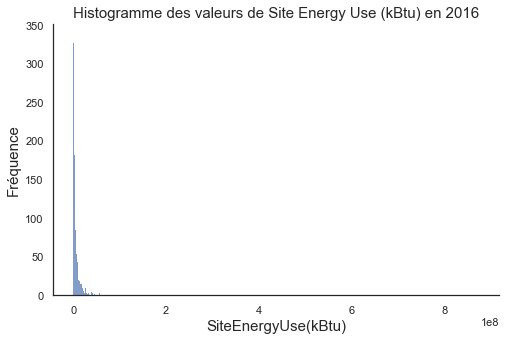

In [110]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng16['SiteEnergyUse(kBtu)'])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de Site Energy Use (kBtu) en 2016', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel('SiteEnergyUse(kBtu)', fontsize = 15)

Text(0.5, 0, 'GHGEmissions_MetricTonsCO2e')

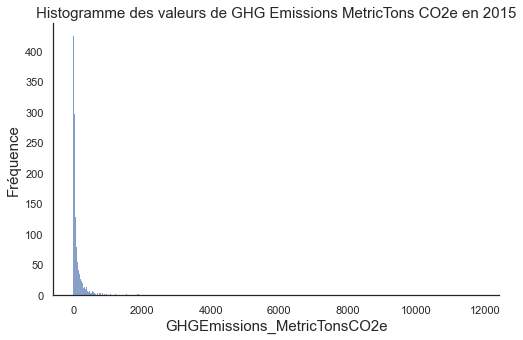

In [111]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng15['GHGEmissions_MetricTonsCO2e'])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de GHG Emissions MetricTons CO2e en 2015', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel('GHGEmissions_MetricTonsCO2e', fontsize = 15)

Text(0.5, 0, 'GHGEmissions_MetricTonsCO2e')

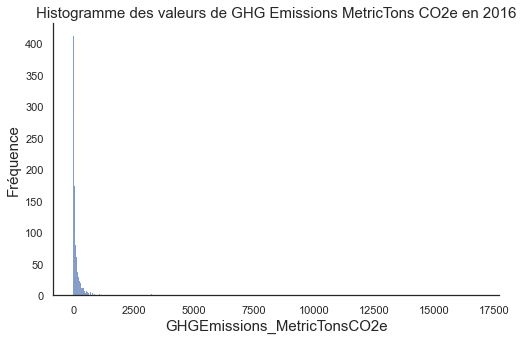

In [112]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng16['GHGEmissions_MetricTonsCO2e'])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de GHG Emissions MetricTons CO2e en 2016', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel('GHGEmissions_MetricTonsCO2e', fontsize = 15)

In [113]:
# The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. 
# The natural logarithm is logarithm in base e.

# transformer les variables dépendentes en log 
build4_eng15["Log_SiteEnergyUse"] = np.log(build4_eng15['SiteEnergyUse(kBtu)'])
build4_eng16["Log_SiteEnergyUse"] = np.log(build4_eng16['SiteEnergyUse(kBtu)'])

build4_eng15["Log_GHGEmissions"] = np.log(build4_eng15['GHGEmissions_MetricTonsCO2e'])
build4_eng16["Log_GHGEmissions"] = np.log(build4_eng16['GHGEmissions_MetricTonsCO2e'])


Text(0.5, 0, '')

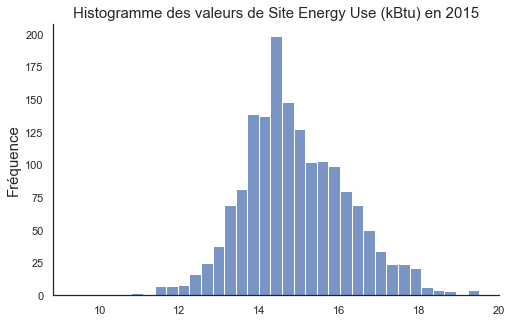

In [114]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng15["Log_SiteEnergyUse"])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de Site Energy Use (kBtu) en 2015', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel('', fontsize = 15)


Text(0.5, 0, ')')

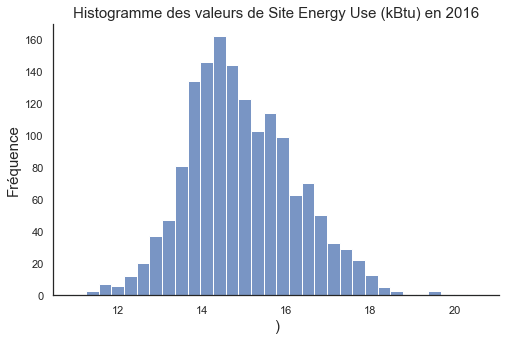

In [115]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng16["Log_SiteEnergyUse"])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de Site Energy Use (kBtu) en 2016', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel(')', fontsize = 15)

Text(0.5, 0, ')')

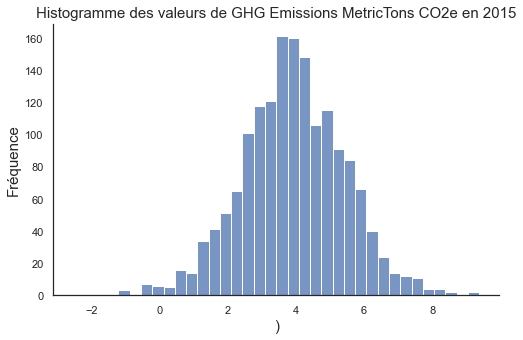

In [116]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng15["Log_GHGEmissions"])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de GHG Emissions MetricTons CO2e en 2015', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel(')', fontsize = 15)

Text(0.5, 0, ')')

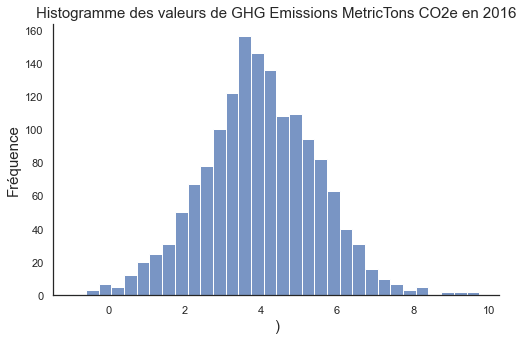

In [117]:
fig, axes = plt.subplots(figsize = [8, 5])
sns_plot = sns.histplot(build4_eng16["Log_GHGEmissions"])
sns.set(style= "white")
sns.despine()
plt.title('Histogramme des valeurs de GHG Emissions MetricTons CO2e en 2016', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 15)
plt.xlabel(')', fontsize = 15)

In [118]:
build4_eng15.sort_values(by= 'GHGEmissions_MetricTonsCO2e', ascending=False).to_csv("energycheck15.csv")
build4_eng16.sort_values(by= 'SiteEnergyUse(kBtu)', ascending=False).to_csv("energycheck16.csv")

## Inspection des différentes variables en lien avec la consommation d'énergie 

In [119]:
def site_intensity_check15(df, csv_name):
    
    new_df = pd.DataFrame()
    
    # calculer la somme des consommation totale d’énergie de bâtiments, et la comparer à la valeur donnée
    # dans le jeu de données
    new_df["manual_siteEUI_from_total"] = (df['SiteEUI(kBtu/sf)'] * df['PropertyGFATotal'])
    new_df["manual_siteEUI_from_buildings"] = (df['SiteEUI(kBtu/sf)'] * df['PropertyGFABuilding(s)'])
    
    # calculer la différence entre notre valeur et celle du jeu de données
    new_df["diff_siteEUI_from_total"] = abs(df['SiteEnergyUse(kBtu)'] - new_df["manual_siteEUI_from_total"])
    new_df["diff_siteEUI_from_buildings"] = abs(df['SiteEnergyUse(kBtu)'] - new_df["manual_siteEUI_from_buildings"])

    new_df['SiteEnergyUse(kBtu)'] = df['SiteEnergyUse(kBtu)']
    new_df['SiteEnergyUseWN(kBtu)'] = df['SiteEnergyUseWN(kBtu)']

    new_df.sort_values(by = "diff_siteEUI_from_buildings", ascending=False).to_csv(csv_name)
    
    return new_df


In [120]:
# go = site_intensity_check15(build5_eng15, 'check15site.csv')
# go2 = site_intensity_check15(build5_eng16, 'check16site.csv')

# on ne retrouve pas la valeur exacte de SiteEnergyUse(kBtu)' mais avec 'PropertyGFABuilding(s)' on 
# arrive à un résultat plus proche de la réalité
# la proportion de la propriété qui est batiments vs parking, ça peut etre important pour 
# la consommation d'energie 

In [121]:
def GHGEmissions_intensity_check(df, csv_name):
    new_df = pd.DataFrame()
    
    # calculer la somme des consommation totale d’énergie de bâtiments, et la comparer à la valeur donnée
    # dans le jeu de données
    new_df["manual_GHGEmissions_from_total"] = ((df['GHGEmissionsIntensity_kgCO2e_ft2']/1000) * df['PropertyGFATotal'])
    new_df["manual_GHGEmissions_from_buildings"] = ((df['GHGEmissionsIntensity_kgCO2e_ft2']/1000) * df['PropertyGFABuilding(s)'])
    
    # calculer la différence entre notre valeur et celle du jeu de données
    new_df["diff_GHGEmissions_from_total"] = abs(df['GHGEmissions_MetricTonsCO2e'] - new_df["manual_GHGEmissions_from_total"])
    new_df["diff_GHGEmissions_from_buildings"] = abs(df['GHGEmissions_MetricTonsCO2e'] - new_df["manual_GHGEmissions_from_buildings"])

    new_df['GHGEmissions_MetricTonsCO2e'] = df['GHGEmissions_MetricTonsCO2e']

    new_df.sort_values(by = "diff_GHGEmissions_from_total", ascending=False).to_csv(csv_name)
    
    return new_df


In [122]:
# go = GHGEmissions_intensity_check(build5_eng15, 'check15em.csv')
# go2 = GHGEmissions_intensity_check(build5_eng16, 'check16em.csv')

# on ne retrouve pas la valeur exacte de GHGEmissions_MetricTonsCO2e mais avec 'PropertyGFATotal' on 
# arrive à un résultat plus proche de la réalité

## Réconciliation des 2 Jeux de Données (2015 2016)

In [123]:
build4_eng15.columns

Index(['ElectricitykBtu_Maj', 'NaturalGas(kBtu)_Maj', 'SteamUse(kBtu)_Maj',
       'index', 'OSEBuildingID', 'DataYear', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions_MetricTonsCO2e', 'GHGEmissionsIntensity_kgCO2e_ft2',
       'DefaultData', 'LargestPropertyUseT_Office',
       'LargestPropertyUseT_Non_Refrig_Warehouse', 'LargestPropertyUseT_Other',
       'Age', 'maxEnergy_type', 'Building_GFA_percentage',
       'Parking_GFA_percentage', 'Log_SiteEnergyUse', 'Log_GHGEmissions'],
      dtype='object')

In [124]:
print("Il y a:", build4_eng15.shape[0], "lignes et", build4_eng15.shape[1], "colonnesdans le dataframe")
print("Il y a:", build4_eng16.shape[0], "lignes et", build4_eng16.shape[1], "colonnesdans le dataframe")

# liste de colonnes pour le dataframe final
list1 = ['OSEBuildingID', 'DataYear', 'YearBuilt', 'Age', 
         'NumberofBuildings','NumberofFloors', 
         'PropertyGFATotal', 'PropertyGFAParking',
         'PropertyGFABuilding(s)', 
         'Building_GFA_percentage', 'Parking_GFA_percentage',
         'YearsENERGYSTARCertified', 'ENERGYSTARScore', 
         'SiteEnergyUse(kBtu)', 
         'maxEnergy_type',
         'ElectricitykBtu_Maj', 'NaturalGas(kBtu)_Maj', 'SteamUse(kBtu)_Maj',
         'LargestPropertyUseType',
         'LargestPropertyUseT_Office', 'LargestPropertyUseT_Non_Refrig_Warehouse', 'LargestPropertyUseT_Other',
         'GHGEmissions_MetricTonsCO2e', 'GHGEmissionsIntensity_kgCO2e_ft2',
         'Log_SiteEnergyUse', 'Log_GHGEmissions']
    
build5_eng16 = build4_eng16[list1].copy()

build5_eng15 = build4_eng15[list1].copy()

print("Il y a:", build5_eng15.shape[0], "lignes et", build5_eng15.shape[1], "colonnesdans le dataframe")
print("Il y a:", build5_eng16.shape[0], "lignes et", build5_eng16.shape[1], "colonnesdans le dataframe")

Il y a: 1630 lignes et 37 colonnesdans le dataframe
Il y a: 1534 lignes et 36 colonnesdans le dataframe
Il y a: 1630 lignes et 26 colonnesdans le dataframe
Il y a: 1534 lignes et 26 colonnesdans le dataframe


In [125]:
# concat les dataframes pour les années 2015 et 2016
totaldf = pd.concat([build5_eng15.copy(), build5_eng16.copy()])
totaldf 

,OSEBuildingID,DataYear,YearBuilt,Age,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Building_GFA_percentage,...,NaturalGas(kBtu)_Maj,SteamUse(kBtu)_Maj,LargestPropertyUseType,LargestPropertyUseT_Office,LargestPropertyUseT_Non_Refrig_Warehouse,LargestPropertyUseT_Other,GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2,Log_SiteEnergyUse,Log_GHGEmissions
0,1,2015,1927,94,1.0,12.0,88434,0,88434,100.000000,...,0,0,Hotel,0,0,1,249.43,2.64,15.758764,5.519178
1,2,2015,1996,25,1.0,11.0,103566,15064,88502,85.454686,...,1,0,Hotel,0,0,1,263.51,2.38,15.938279,5.574091
2,3,2015,1969,52,1.0,41.0,961990,0,961990,100.000000,...,0,0,Hotel,0,0,1,2061.48,1.92,18.107758,7.631179
3,5,2015,1926,95,1.0,10.0,61320,0,61320,100.000000,...,0,1,Hotel,0,0,1,1936.34,31.38,17.155872,7.568555
4,8,2015,1980,41,1.0,18.0,119890,12460,107430,89.607140,...,1,0,Hotel,0,0,1,507.70,4.02,16.512102,6.229891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,50221,2016,1982,39,1.0,1.0,18261,0,18261,100.000000,...,0,0,Other - Recreation,0,0,1,20.33,1.11,13.745176,3.012098
1532,50223,2016,2004,17,1.0,1.0,16000,0,16000,100.000000,...,1,0,Other - Recreation,0,0,1,32.17,2.01,13.764508,3.471034
1533,50224,2016,1974,47,1.0,1.0,13157,0,13157,100.000000,...,1,0,Other - Recreation,0,0,1,223.54,16.99,15.567471,5.409590
1534,50225,2016,1989,32,1.0,1.0,14101,0,14101,100.000000,...,1,0,Other - Recreation,0,0,1,22.11,1.57,13.486272,3.096030


In [126]:
totaldf.reset_index(inplace=True)
totaldf = totaldf.drop('index', axis=1).copy()

totaldf.rename(columns = {'level_0':'indexer'}, inplace = True)

print("Il y a:", totaldf.shape[0], "lignes et", totaldf.shape[1], "colonnesdans le dataframe")

Il y a: 3164 lignes et 26 colonnesdans le dataframe


In [127]:
# sauvegarder le dataframe en format csv
totaldf.to_csv("combined15_16.csv")

In [128]:
totaldf.describe().to_csv("totaldf_describe.csv")


In [129]:
# pas de lignes dupliquées dans le dataframe final
dupliROWS = totaldf[totaldf.duplicated(keep = False)]
dupliROWS

,OSEBuildingID,DataYear,YearBuilt,Age,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Building_GFA_percentage,...,NaturalGas(kBtu)_Maj,SteamUse(kBtu)_Maj,LargestPropertyUseType,LargestPropertyUseT_Office,LargestPropertyUseT_Non_Refrig_Warehouse,LargestPropertyUseT_Other,GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2,Log_SiteEnergyUse,Log_GHGEmissions
